# Hidden Markov Model

- [Evaluation](#Evaluation)
- [Decoding](#Decoding)
- [Learning](#Learning)
- [Predict](#Predict)
- [HAR with HMM](#HAR-with-HMM)

In [1]:
from collections import defaultdict
import math
import random
import pickle

from hmmlearn.hmm import MultinomialHMM, GaussianHMM
from hmmlearn.base import ConvergenceMonitor
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.style.use('seaborn-white')

## Evaluation
Probability of given observation with given model

In [2]:
hmm = MultinomialHMM(n_components=2) # [FAIR, LOADED]

# Num of observations
hmm.n_features = 6

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.5, 0.5]
hmm.transmat_ = [[0.95, 0.05],
                 [0.05, 0.95]]
hmm.emissionprob_ = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                     [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]]

In [3]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1, 1) - 1

In [4]:
# Evaluation
hmm.score(X) # return log(probability)

-71.28707008782621

In [5]:
# Observation with just Fair dice
X_6 = np.array([random.randint(0, 5) for _ in range(X.shape[0])]).reshape(-1, 1)

# lower probability
hmm.score(X_6)

-82.79880805639168

## Decoding
Most likely sequence of states with given observations and model

In [6]:
hmm = MultinomialHMM(n_components=2) # [FAIR, LOADED]

# Num of observations
hmm.n_features = 6

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.5, 0.5]
hmm.transmat_ = [[0.95, 0.05],
                 [0.05, 0.95]]
hmm.emissionprob_ = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                     [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]]

In [7]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1, 1) - 1

In [8]:
# Decoding
hmm.decode(X)

(-74.25710830623268,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

## Learning
Most(?) likely model with given observations

In [9]:
hmm = MultinomialHMM(n_components=2, verbose=True, n_iter=20)

In [10]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1, 1) - 1

In [11]:
# Learning
hmm.fit(X)

         1         -79.8119             +nan
         2         -67.4132         +12.3987
         3         -67.2503          +0.1629
         4         -67.0802          +0.1702
         5         -66.8910          +0.1892
         6         -66.6582          +0.2329
         7         -66.3488          +0.3093
         8         -65.9433          +0.4056
         9         -65.4629          +0.4804
        10         -64.9803          +0.4826
        11         -64.5741          +0.4062
        12         -64.2691          +0.3050
        13         -64.0444          +0.2247
        14         -63.8767          +0.1677
        15         -63.7528          +0.1238
        16         -63.6634          +0.0894
        17         -63.5992          +0.0642
        18         -63.5520          +0.0472
        19         -63.5152          +0.0368
        20         -63.4838          +0.0313


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
               n_iter=20, params='ste',
               random_state=<mtrand.RandomState object at 0x7fcacc0640d8>,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=True)

**Learned Model**

In [12]:
hmm.emissionprob_

array([[1.13647660e-03, 1.10286439e-01, 4.58174921e-02, 6.16561853e-02,
        4.53276875e-02, 7.35775720e-01],
       [5.58380843e-01, 3.43248169e-04, 2.10389393e-01, 1.86306821e-01,
        4.31014824e-02, 1.47821267e-03]])

In [13]:
hmm.startprob_

array([1.3828658e-28, 1.0000000e+00])

In [14]:
hmm.transmat_

array([[0.44921716, 0.55078284],
       [0.88708983, 0.11291017]])

## Predict
Predict next observations and states

In [15]:
X, Z = hmm.sample(n_samples=10)
X, Z

(array([[0],
        [2],
        [5],
        [0],
        [2],
        [5],
        [1],
        [5],
        [0],
        [5]]), array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0]))

---
## HAR with HMM

### Using Segments

#### Load data

In [16]:
with open('Data/HAR_segments_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [17]:
type(X), type(y), len(X), len(y)

(list, list, 30, 30)

In [18]:
type(X[0]), X[0].shape, set(y)

(numpy.ndarray, (3072, 3), {'running', 'standing', 'walking'})

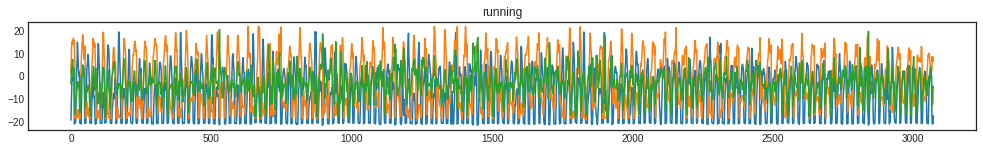

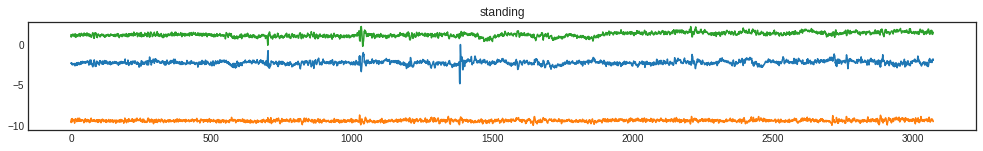

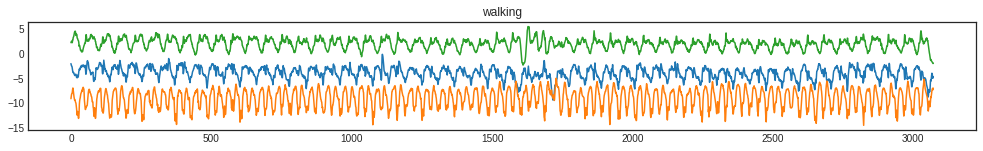

In [19]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[10])
plt.plot(X[10])
plt.show()

plt.title(y[20])
plt.plot(X[20])
plt.show()

In [20]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'walking': 2, 'running': 0, 'standing': 1}


#### Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [21]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30)
        for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for segment, motion in zip(X_train, y_train):
    X_train_dict[motion].append(segment)
    lengths_dict[motion].append(segment.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### Test Model

In [22]:
def _predict(segment):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(segment) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(segments):
    return [_predict(segment) for segment in segments]
    
y_pred = predict(X_test)
y_true = y_test

#### Visualize

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
        normalize=False,
        title=None,
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='True label',
            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout()
    plt.show()


In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



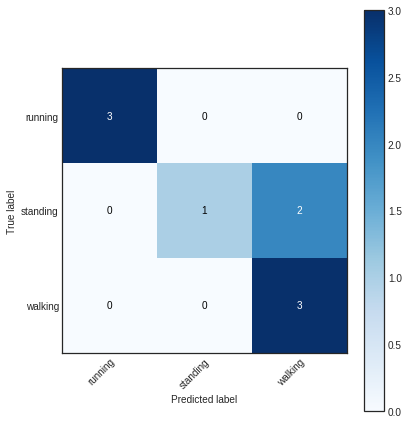

In [25]:
plt.rcParams['figure.figsize'] = (6, 6)

plot_confusion_matrix(y_true, y_pred, classes)

### Using Sliding Window

#### Load data

In [26]:
with open('Data/HAR_slices_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [27]:
type(X), type(y), len(X), len(y)

(list, list, 2940, 2940)

In [28]:
type(X[0]), X[0].shape, set(y)

(numpy.ndarray, (150, 3), {'running', 'standing', 'walking'})

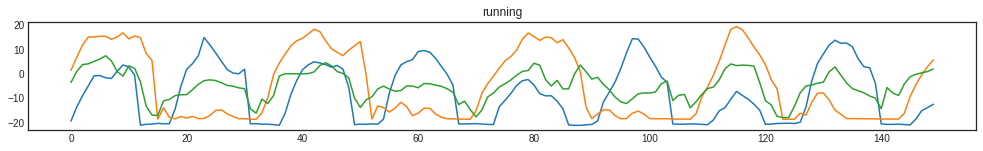

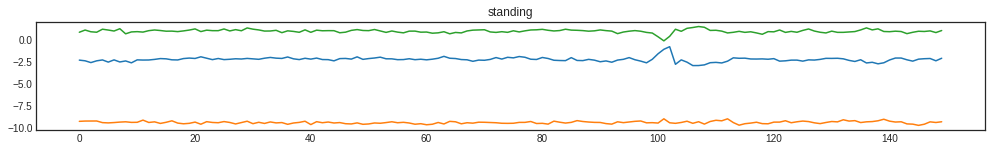

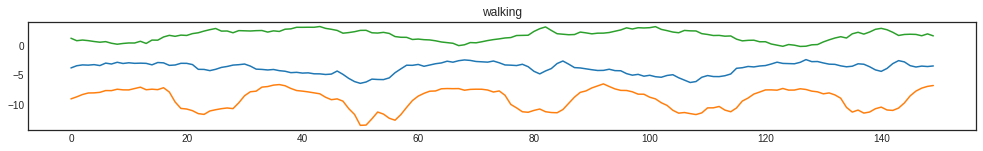

In [29]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[1000])
plt.plot(X[1000])
plt.show()

plt.title(y[2000])
plt.plot(X[2000])
plt.show()

In [30]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'walking': 2, 'running': 0, 'standing': 1}


#### Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [31]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30)
        for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for slide, motion in zip(X_train, y_train):
    X_train_dict[motion].append(slide)
    lengths_dict[motion].append(slide.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### Test Model

In [32]:
def _predict(slide):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(slide) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(slides):
    return [_predict(slide) for slide in slides]
    
y_pred = predict(X_test)
y_true = y_test

#### Visualize

In [33]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     running       1.00      1.00      1.00       245
    standing       1.00      1.00      1.00       245
     walking       1.00      1.00      1.00       245

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



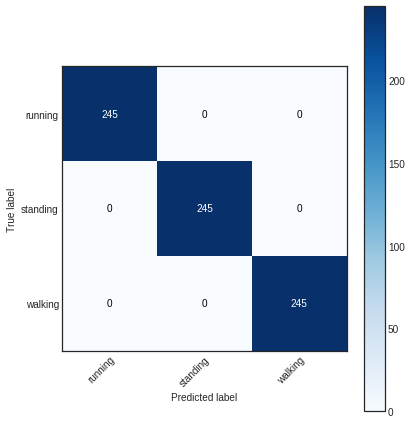

In [34]:
plt.rcParams['figure.figsize'] = (6, 6)

plot_confusion_matrix(y_true, y_pred, classes)